In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Oil and Gas Exploration and Production in the State of Kentucky Shown as Quarter-Mile Cells
Citation: Biewick, L.R., 2008, Oil and Gas Exploration and Production in the State of Kentucky Shown as Quarter-Mile Cells: U.S. Geological Survey data release,   
**https://doi.org/10.5066/P13NZURP.**  
Summary: A cells polygon feature class was created by the U.S. Geological Survey (USGS) to illustrate the degree of exploration, type of production, and distribution of production in the State of Kentucky. Each cell represents a quarter-mile square of the land surface, and the cells are coded to represent whether the wells included within the cell are predominantly oil-producing, gas-producing, both oil and gas-producing, or the type of production of the wells located within the cell is unknown or dry. Data were retrieved from the Kentucky Oil and Gas Well Records database and saved as a shapefile of oil and gas well locations for Kentucky. Cells were developed as a graphic solution to overcome the problem of displaying proprietary well data. No proprietary data are displayed or included in the cell maps. The data are current as of 2005.

In [2]:
shapefile_path = "kycells05g/kycells05g.shp"
gdf_oilgas = gpd.read_file(shapefile_path)
print(gdf_oilgas.head())

   CC83XCOORD  CC83YCOORD  CELLSYMB  \
0  -87.612162   37.456436         4   
1  -82.175694   37.456213         2   
2  -84.759818   37.456264         1   
3  -87.105100   37.456329         4   
4  -87.713574   37.456204         4   

                                            geometry  
0  POLYGON ((-87.61633 37.46033, -87.60718 37.459...  
1  POLYGON ((-82.17957 37.46028, -82.17049 37.459...  
2  POLYGON ((-84.76492 37.45312, -84.76384 37.460...  
3  POLYGON ((-87.10924 37.46024, -87.1001 37.4595...  
4  POLYGON ((-87.71775 37.46009, -87.7086 37.4594...  


In [3]:
print("\n--- Shapefile Metadata ---")
print(gdf_oilgas.info())
print("\n--- Coordinate Reference System (CRS) ---")
print(gdf_oilgas.crs)
print("\n--- Column Names ---")
print(gdf_oilgas.columns)
print("\n--- Geometry Type ---")
print(gdf_oilgas.geom_type.value_counts())
print(f"\nTotal Number of Features: {len(gdf_oilgas)}")


--- Shapefile Metadata ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32478 entries, 0 to 32477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CC83XCOORD  32478 non-null  float64 
 1   CC83YCOORD  32478 non-null  float64 
 2   CELLSYMB    32478 non-null  int64   
 3   geometry    32478 non-null  geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 1015.1 KB
None

--- Coordinate Reference System (CRS) ---
GEOGCS["DD_NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

--- Column Names ---
Index(['CC83XCOORD', 'CC83YCOORD', 'CELLSYMB', 'geometry'], dtype='object')

--- Geometry Type ---
Polygon    32478
Name: count, dtype: int64

Total Number of Features: 32478


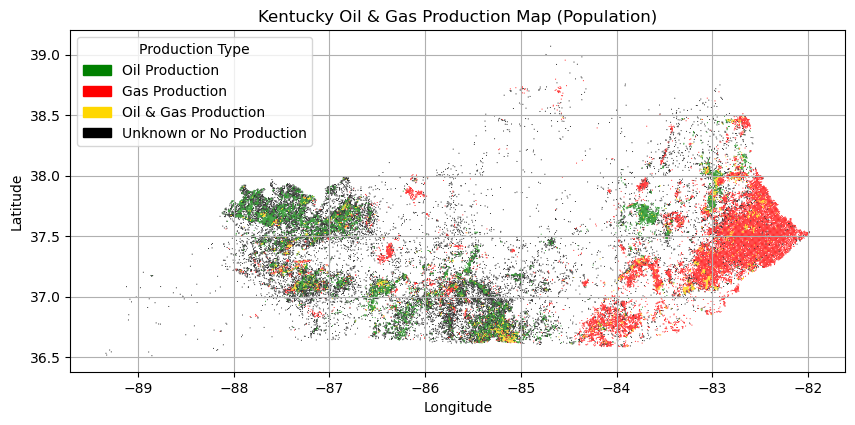

In [4]:
# Define production types and corresponding colors
production_labels = {
    1: "Oil Production",
    2: "Gas Production",
    3: "Oil & Gas Production",
    4: "Unknown or No Production"
}

production_colors = {
    1: "green",
    2: "red",
    3: "gold",
    4: "black"
}

# Plot the oil and gas production map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each category separately
for prod_type, color in production_colors.items():
    subset = gdf_oilgas[gdf_oilgas["CELLSYMB"] == prod_type]
    subset.plot(ax=ax, color=color, label=production_labels[prod_type])

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(production_labels.values(), production_colors.values())]
ax.legend(handles=legend_patches, loc="upper left", title="Production Type")

# Add titles and labels
ax.set_title("Kentucky Oil & Gas Production Map (Population)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()

<Axes: >

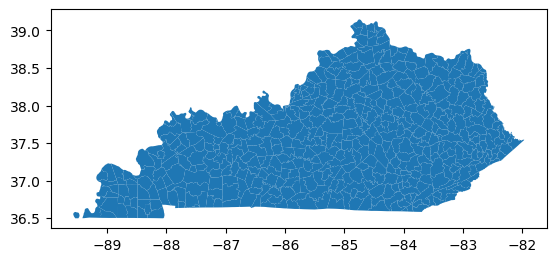

In [5]:
shapefile_path_ky_counties = "tl_2016_21_cousub/tl_2016_21_cousub.shp"
gdf_ky_counties = gpd.read_file(shapefile_path_ky_counties)
gdf_ky_counties.plot()

In [11]:
hydroshed_path = "/Users/jmframe/data/hybas_na_lev01-12_v1c/hybas_na_lev12_v1c.shp"
gdf_hydroshed = gpd.read_file(hydroshed_path)

/var/folders/08/fcnqv5n16bd3p26sxm806b080000gp/T/ipykernel_90906/705667017.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  gdf_hydroshed_clipped = gpd.clip(gdf_hydroshed, ky_boundary)


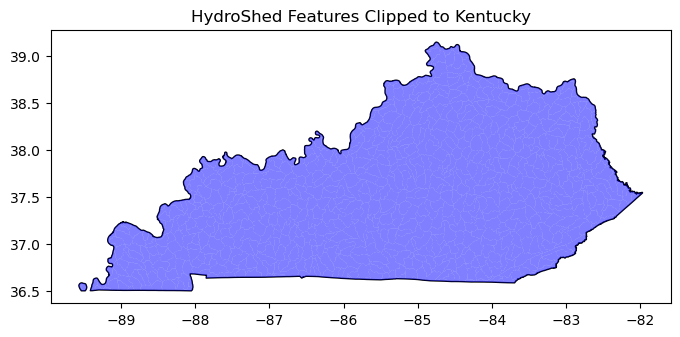

In [12]:
# Dissolve Kentucky counties into a single boundary polygon
ky_boundary = gdf_ky_counties.dissolve(by="STATEFP")

# Clip HydroShed data to Kentucky boundary
gdf_hydroshed_clipped = gpd.clip(gdf_hydroshed, ky_boundary)

# Save clipped shapefile (optional)
output_path = "/Users/jmframe/data/hydroshed_clipped_to_KY.shp"
gdf_hydroshed_clipped.to_file(output_path)

# Plot to check the result
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ky_boundary.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
gdf_hydroshed_clipped.plot(ax=ax, color="blue", alpha=0.5)
plt.title("HydroShed Features Clipped to Kentucky")
plt.show()